In [39]:
#Descreption: This progrm uses an artificial recurent neural network called Long Short Term Memory (LSTM)
#             to predict the clossing stock price of a corporation (Apple Inc. ) using the past 60 daya price.

In [40]:
import math
import pandas as pd

import matplotlib.pyplot as plt
from keras.models import Sequential
from pandas_datareader import data as web
from datetime import datetime
from sklearn import preprocessing
import numpy as np
from finta import TA
import keras
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
from keras.callbacks import History 
from sklearn.metrics import mean_squared_error
import numpy as np

In [41]:
df = web.DataReader('ABNB', data_source= 'yahoo', start= '2000-04-01', end= '2022-07-12')

Text(0, 0.5, 'Close Price USD ($)')

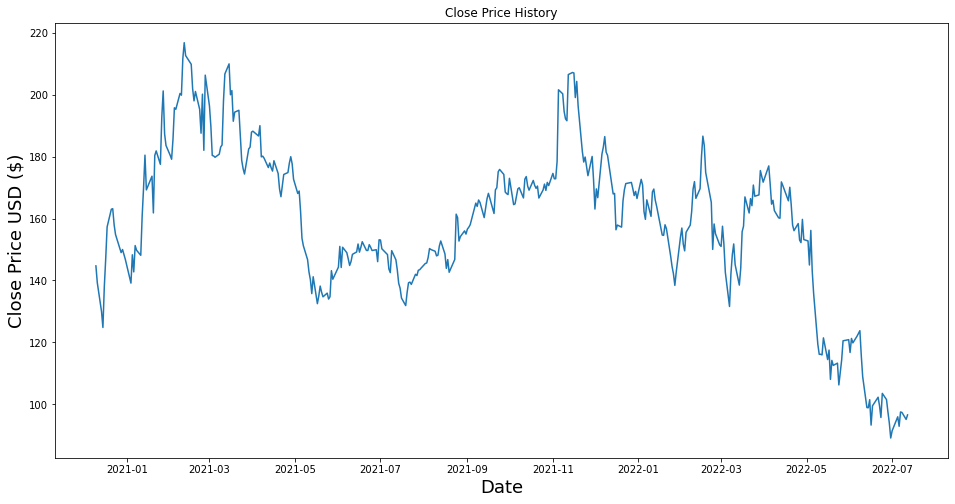

In [42]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [43]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
dataset = data.values 
training_data_len = math.ceil( len(dataset) * .8)

training_data_len


319

In [44]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.43542586],
       [0.39268942],
       [0.32028804],
       [0.27958675],
       [0.38282722],
       [0.45374142],
       [0.53396998],
       [0.57874143],
       [0.58007204],
       [0.5395272 ],
       [0.51471507],
       [0.46900439],
       [0.47683157],
       [0.46454284],
       [0.45178463],
       [0.39190665],
       [0.46352539],
       [0.42024111],
       [0.48677211],
       [0.47503135],
       [0.46219478],
       [0.56136509],
       [0.63329686],
       [0.71556044],
       [0.62766129],
       [0.66225739],
       [0.56942708],
       [0.71477768],
       [0.72628364],
       [0.69231372],
       [0.81136512],
       [0.87797435],
       [0.76933311],
       [0.74005954],
       [0.71509083],
       [0.70515028],
       [0.75641831],
       [0.83531626],
       [0.8314809 ],
       [0.87155601],
       [0.86725116],
       [0.95945528],
       [1.        ],
       [0.96743892],
       [0.94536634],
       [0.8835317 ],
       [0.85284906],
       [0.876

In [45]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 20:
        print(x_train)
        print(y_train)
        print()

[array([0.43542586, 0.39268942, 0.32028804, 0.27958675, 0.38282722,
       0.45374142, 0.53396998, 0.57874143, 0.58007204, 0.5395272 ,
       0.51471507, 0.46900439, 0.47683157, 0.46454284, 0.45178463,
       0.39190665, 0.46352539, 0.42024111, 0.48677211, 0.47503135])]
[0.46219478389691293]



In [46]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(299, 20, 1)

In [47]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

299/299 [==============================] - 10s 16ms/step - loss: 0.0147


In [50]:
test_data = scaled_data[training_data_len - 20: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])

In [51]:
x_test = np.array(x_test)


In [52]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [53]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [54]:
#Get the root mean squared error (RMSE)
rnse = np.sqrt( np.mean(predictions - y_test )**2 )
rnse

8.857412603837025

<ipython-input-55-c4a975dc36fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


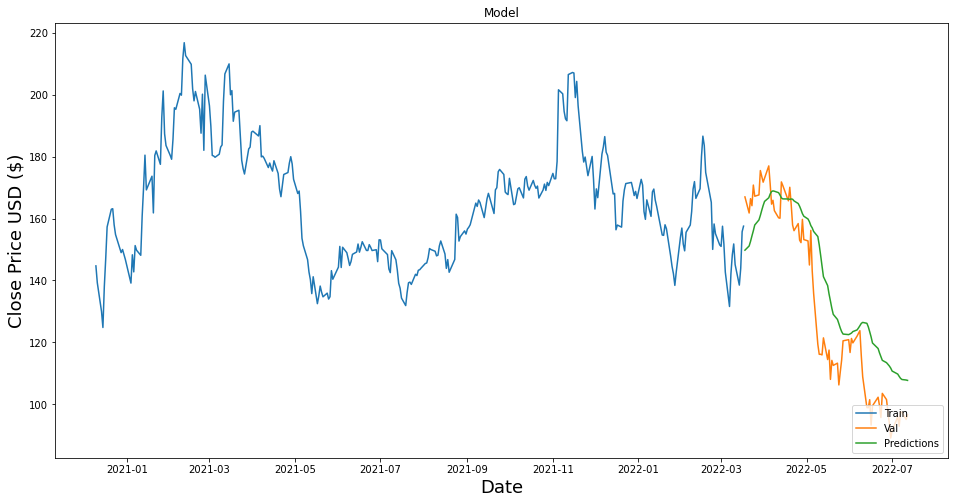

In [55]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [56]:
valid

,Close,Predictions
Date,,
2022-03-18,167.000000,149.787460
2022-03-21,161.800003,151.146851
2022-03-22,166.440002,152.644791
2022-03-23,164.160004,154.396072
2022-03-24,170.830002,156.066391
...,...,...
2022-07-06,92.879997,109.024139
2022-07-07,97.500000,108.364197
2022-07-08,97.349998,107.995003


In [57]:
CL=F_quote = web.DataReader('ABNB', data_source= 'yahoo', start= '2000-06-18', end= '2022-07-12')
new_df = CL=F_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days = scaler.transform(last_60_days)

x_test = []
x_test.append(last_60_days) 
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[107.67942]]
